In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# 导入数据

In [22]:
# ChinaBank = pd.read_csv('ChinaBank.csv',index_col = 'Date',parse_dates=['Date'])
# import pandas as pd  
# from datetime import datetime  
# # 自定义日期时间解析函数  
# def custom_date_parser(date_str):  
#     return datetime.strptime(date_str, '%Y/%m/%d %H:%M')   
# # 使用自定义的日期时间解析函数读取 Excel 文件  
# df = pd.read_csv('train_3.csv',  index_col='date', parse_dates=['date'], date_parser=custom_date_parser)  
# df.head()
import pandas as pd  
from datetime import datetime  
  
# 自定义日期时间解析函数  
def custom_date_parser(date_str):  
    return datetime.strptime(date_str, '%Y/%m/%d %H:%M')  
# 使用自定义的日期时间解析函数读取 CSV 文件  
# df = pd.read_csv('train_3.csv', index_col='date', parse_dates=['date'], date_parser=custom_date_parser)  
df = pd.read_csv('train_3.csv', index_col='date', parse_dates=['date'])  
# 查看前几行数据  
df.head()

,irradiance,wind,wind_trend,temperature,pressure,humidity,actually_irradiance,target
date,,,,,,,,
2017-08-01 10:00:00,-0.863544,-0.917355,202,0.512500,0.071429,0.782609,88.6000,3.69867
2017-08-01 10:15:00,-0.843177,-0.933884,207,0.516667,0.071429,0.760870,88.2667,3.53233
2017-08-01 10:30:00,-0.812627,-0.933884,214,0.520833,0.071429,0.739130,76.2000,2.94467
2017-08-01 10:45:00,-0.782077,-0.950413,225,0.525000,0.071429,0.717391,60.1333,2.52667
2017-08-01 11:00:00,-0.751527,-0.966942,207,0.529167,0.071429,0.717391,70.8667,2.78167


# 提取Close列

In [23]:
df.index = pd.to_datetime(df.index)
sub = df.loc['2017/8/1 10:00':'2017/9/30 23:45','target']

sub.head()

date
2017-08-01 10:00:00    3.69867
2017-08-01 10:15:00    3.53233
2017-08-01 10:30:00    2.94467
2017-08-01 10:45:00    2.52667
2017-08-01 11:00:00    2.78167
Name: target, dtype: float64

# 划分训练测试集

In [19]:
train = sub.loc['2017/8/1 10:00':'2017/8/31 23:45']
test = sub.loc['2017/9/1 10:00':'2017/9/30 23:45']

Series([], Name: target, dtype: float64)


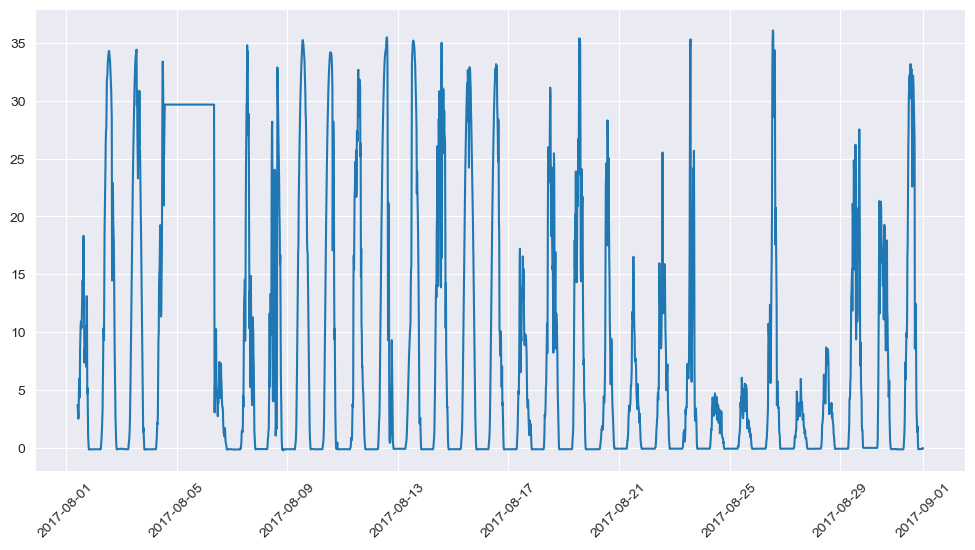

In [24]:
#查看训练集的时间序列与数据(只包含训练集)
plt.figure(figsize=(12,6))
plt.plot(train)
plt.xticks(rotation=45) #旋转45度
plt.show()

# 差分法

In [27]:
#.diff(1)做一个时间间隔
df['diff_1'] = df['target'].diff(1) #1阶差分

#对一阶差分数据在划分时间间隔
df['diff_2'] =df['diff_1'].diff(1) #2阶差分

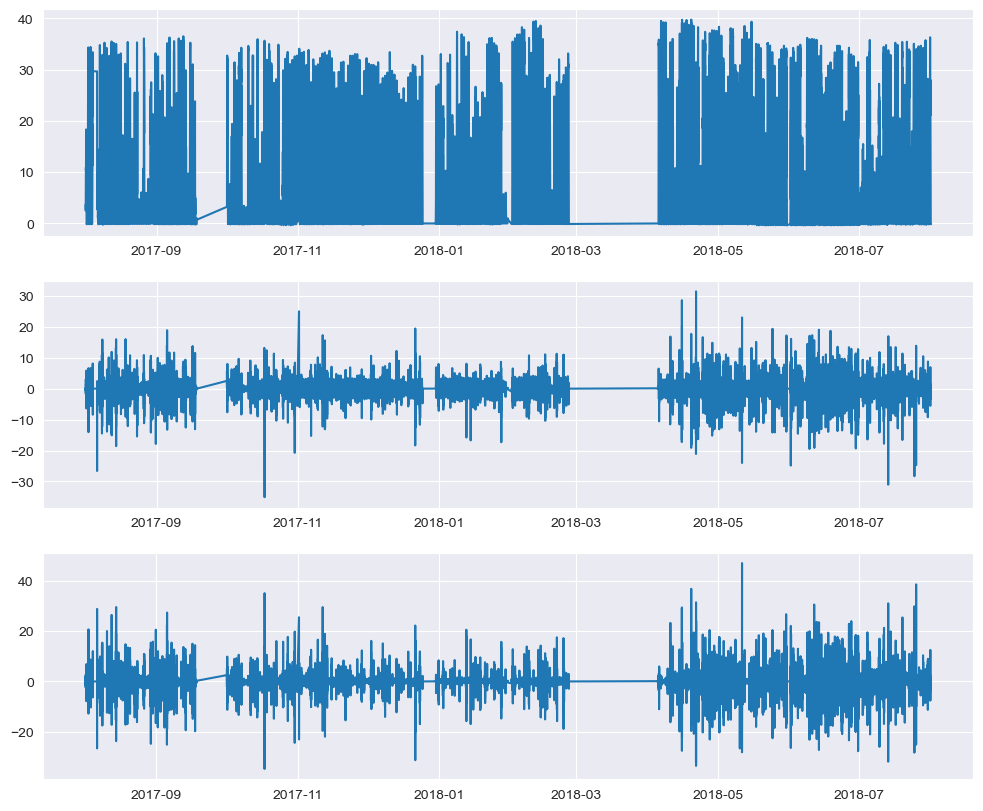

In [28]:
fig = plt.figure(figsize=(12,10))
#原数据
ax1 = fig.add_subplot(311)
ax1.plot(df['target'])
#1阶差分
ax2 = fig.add_subplot(312)
ax2.plot(df['diff_1'])
#2阶差分
ax3 = fig.add_subplot(313)
ax3.plot(df['diff_2'])
plt.show()

# ADF检验

In [30]:
import matplotlib.pyplot as plt
import pandas as pd
import statsmodels.api as sm
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.stattools import adfuller as ADF

# 计算原始序列、一阶差分序列、二阶差分序列的单位根检验结果
df['diff_1'] =df['diff_1'].fillna(0)
df['diff_2'] = df['diff_2'].fillna(0)

timeseries_adf = ADF(df['target'].tolist())
timeseries_diff1_adf = ADF(df['diff_1'].tolist())
timeseries_diff2_adf = ADF(df['diff_2'].tolist())


# 打印单位根检验结果
print('timeseries_adf : ', timeseries_adf)
print('timeseries_diff1_adf : ', timeseries_diff1_adf)
print('timeseries_diff2_adf : ', timeseries_diff2_adf)


timeseries_adf :  (-34.2182242590344, 0.0, 50, 29741, {'1%': -3.430569893900536, '5%': -2.861637187129137, '10%': -2.566821729748453}, 127526.27028249571)
timeseries_diff1_adf :  (-33.698720528152464, 0.0, 50, 29741, {'1%': -3.430569893900536, '5%': -2.861637187129137, '10%': -2.566821729748453}, 128662.35469195501)
timeseries_diff2_adf :  (-41.63737118626402, 0.0, 50, 29741, {'1%': -3.430569893900536, '5%': -2.861637187129137, '10%': -2.566821729748453}, 129773.3707144472)


# 参数确定

In [9]:
import statsmodels.api as sm

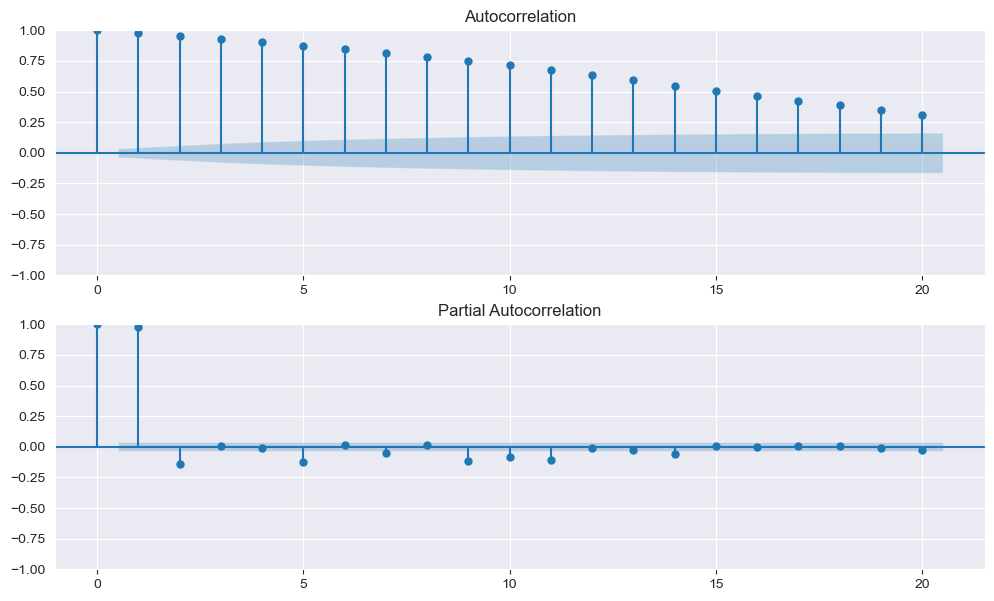

In [31]:
#绘制
fig = plt.figure(figsize=(12,7))

ax1 = fig.add_subplot(211)
fig = sm.graphics.tsa.plot_acf(train, lags=20,ax=ax1)
ax1.xaxis.set_ticks_position('bottom') # 设置坐标轴上的数字显示的位置，top:显示在顶部  bottom:显示在底部
#fig.tight_layout()

ax2 = fig.add_subplot(212)
fig = sm.graphics.tsa.plot_pacf(train, lags=20, ax=ax2)
ax2.xaxis.set_ticks_position('bottom')
#fig.tight_layout()
plt.show()

# 模型建立

In [32]:
#遍历，寻找适宜的参数
import itertools
import numpy as np
import seaborn as sns

In [33]:
#确定pq的取值范围
p_min = 0
d_min = 0
q_min = 0
p_max = 5
d_max = 0
q_max = 5

In [34]:
#Initialize a DataFrame to store the results,，以BIC准则
results_bic = pd.DataFrame(index=['AR{}'.format(i) for i in range(p_min,p_max+1)],
                           columns=['MA{}'.format(i) for i in range(q_min,q_max+1)])

for p,d,q in itertools.product(range(p_min,p_max+1),
                               range(d_min,d_max+1),
                               range(q_min,q_max+1)):
    if p==0 and d==0 and q==0:
        results_bic.loc['AR{}'.format(p), 'MA{}'.format(q)] = np.nan
        continue
    try:
        model = sm.tsa.ARIMA(train, order=(p, d, q),
                               #enforce_stationarity=False,
                               #enforce_invertibility=False,
                              )
        results = model.fit()
        results_bic.loc['AR{}'.format(p), 'MA{}'.format(q)] = results.bic
    except:
        continue

C:\Users\lenovo\.conda\envs\test\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\lenovo\.conda\envs\test\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\lenovo\.conda\envs\test\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\lenovo\.conda\envs\test\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starti

In [35]:
results_bic

,MA0,MA1,MA2,MA3,MA4,MA5
AR0,NaN,19243.87659,16968.719235,15869.781458,15034.967481,14665.362304
AR1,13090.10918,13039.929168,13047.214269,13053.01867,13022.814607,13030.793188
AR2,13039.573458,13047.338471,13024.60704,13025.67871,13030.787191,12989.639611
AR3,13047.33758,13035.262066,13022.597325,12998.054524,12968.366933,12975.318369
AR4,13055.137339,13033.222817,13029.651844,12980.649074,12971.231982,12999.494026
AR5,13015.833879,13017.064784,12969.713758,12977.078099,13025.797914,13034.178427


In [37]:
#得到结果后进行浮点型转换
results_bic = results_bic[results_bic.columns].astype(float)

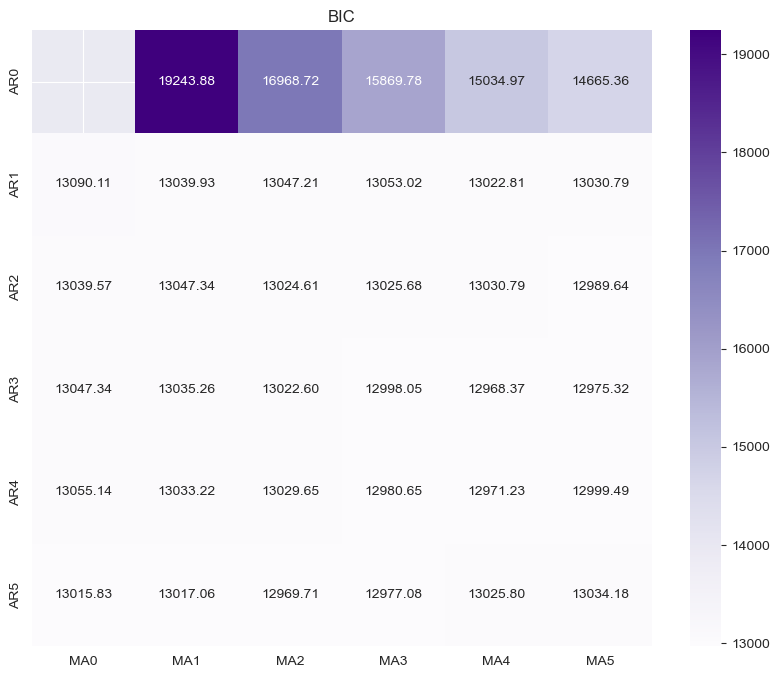

In [38]:
#绘制热力图
fig, ax = plt.subplots(figsize=(10, 8))
ax = sns.heatmap(results_bic,
                 mask=results_bic.isnull(),
                 ax=ax,
                 annot=True,
                 fmt='.2f',
                 cmap="Purples"
                 )

ax.set_title('BIC')
plt.show()

In [39]:
results_bic.stack().idxmin()

('AR3', 'MA4')

# 利用模型取p和q的最优值

In [40]:
train_results = sm.tsa.arma_order_select_ic(train, ic=['aic', 'bic'], trend='n', max_ar=8, max_ma=8)

print('AIC', train_results.aic_min_order)
print('BIC', train_results.bic_min_order)

C:\Users\lenovo\.conda\envs\test\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
C:\Users\lenovo\.conda\envs\test\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
C:\Users\lenovo\.conda\envs\test\lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
C:\Users\lenovo\.conda\envs\test\lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
C:\Users\lenovo\.conda\envs\test\

AIC (8, 7)
BIC (4, 5)


# 模型检验

In [48]:
#根据以上求得
p = 4
d = 2
q = 5

In [49]:
model = sm.tsa.ARIMA(train, order=(p,d,q))
results = model.fit()
resid = results.resid #获取残差

C:\Users\lenovo\.conda\envs\test\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\lenovo\.conda\envs\test\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\lenovo\.conda\envs\test\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\lenovo\.conda\envs\test\lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimizat

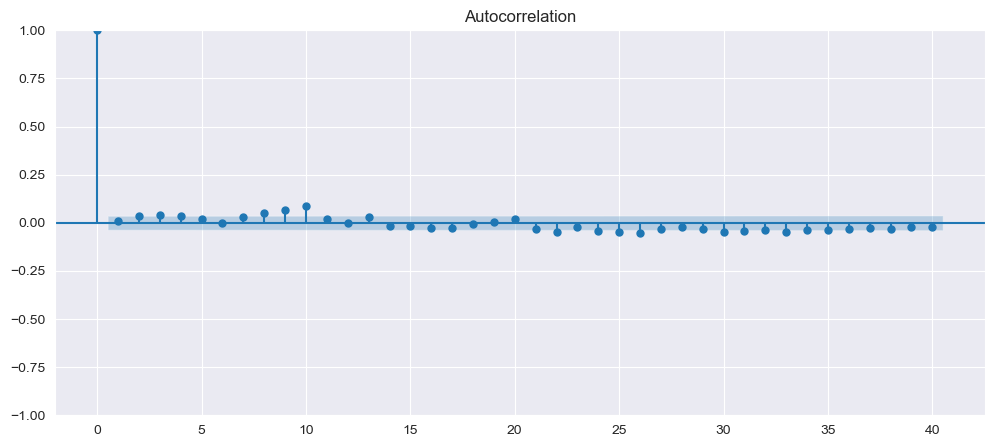

In [51]:
#绘制
#查看测试集的时间序列与数据(只包含测试集)
fig, ax = plt.subplots(figsize=(12, 5))

ax = sm.graphics.tsa.plot_acf(resid, lags=40,ax=ax)

plt.show()

# 模型预测

In [52]:
predict_sunspots = results.predict(dynamic=False)
print(predict_sunspots)

date
2017-08-01 10:00:00    0.000000
2017-08-01 10:15:00    5.548007
2017-08-01 10:30:00    3.366005
2017-08-01 10:45:00    2.528997
2017-08-01 11:00:00    2.145537
                         ...   
2017-08-31 22:45:00   -0.119645
2017-08-31 23:00:00   -0.130026
2017-08-31 23:15:00   -0.058406
2017-08-31 23:30:00    0.013976
2017-08-31 23:45:00   -0.091373
Name: predicted_mean, Length: 2931, dtype: float64


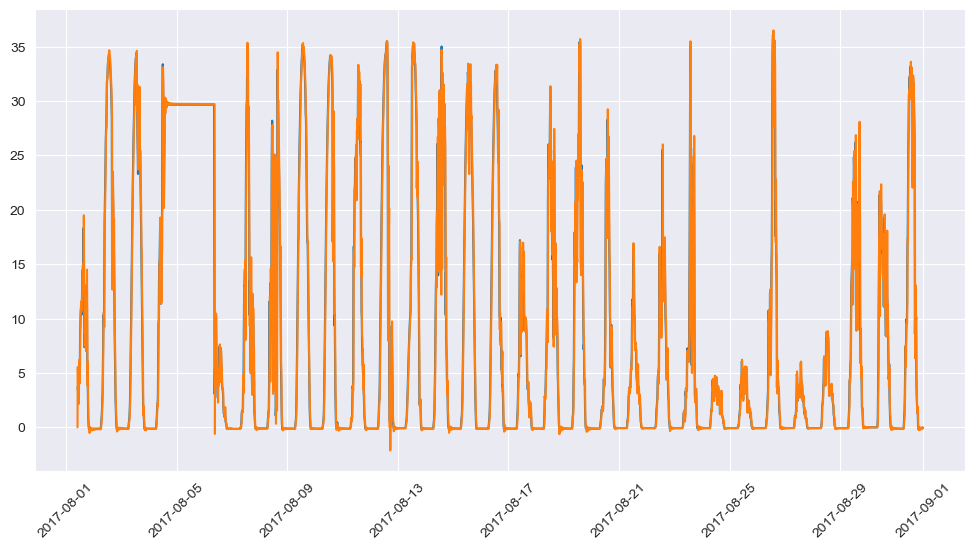

In [53]:
#查看测试集的时间序列与数据(只包含测试集)
plt.figure(figsize=(12,6))
plt.plot(train)
plt.xticks(rotation=45) #旋转45度
plt.plot(predict_sunspots)
plt.show()

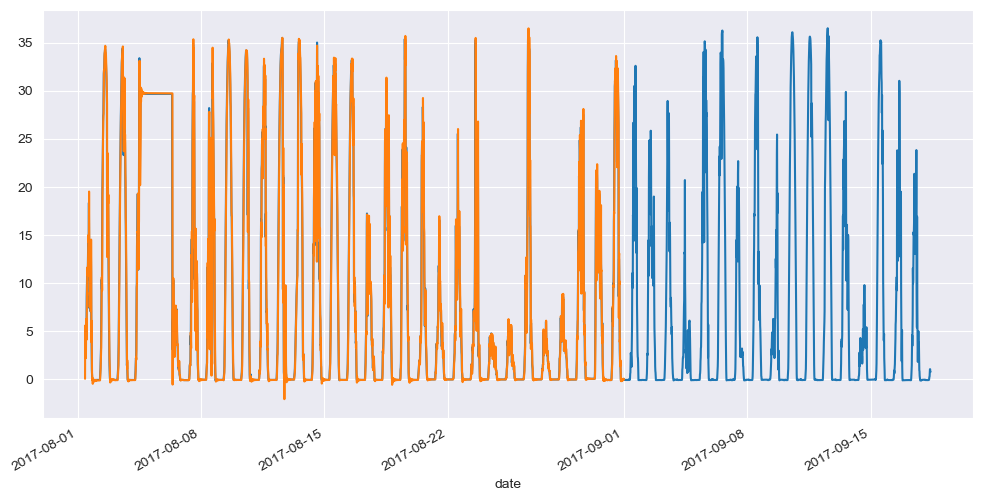

In [54]:
#绘图
fig, ax = plt.subplots(figsize=(12, 6))
ax = sub.plot(ax=ax)
#预测数据
predict_sunspots.plot(ax=ax)
plt.show()